In [1]:
#Pytorch Workwlow
import torch
from torch import nn

In [2]:
#known params
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

In [4]:
#SPLIT, TRAIN AND TEST
train_split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:train_split],X[train_split:], y[:train_split], y[train_split:]

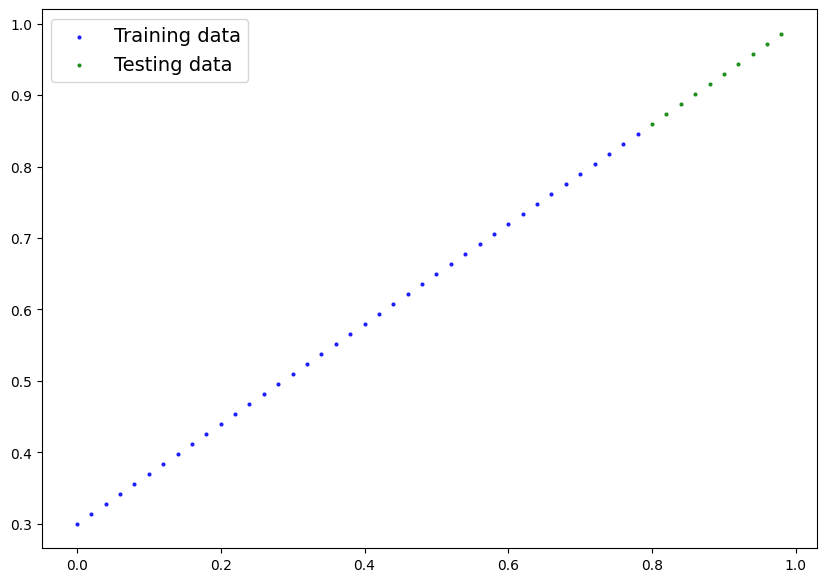

In [5]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train,
                     test_data=X_test,
                     train_labels=y_train,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  #plotting training data
  plt.scatter(train_data.cpu(), train_labels.cpu(), c='blue', s=4, label='Training data', alpha=0.8)

  # plotting testing data
  if predictions is None:
      plt.scatter(test_data.cpu(), test_labels.cpu(), c='green', s=4, label='Testing data', alpha=0.8)

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data.cpu(), predictions.cpu(), c="red", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions()

In [6]:
#torch model. Lin regr
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype= torch.float))
  #forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [7]:
#Create random seed
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [10]:
#make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

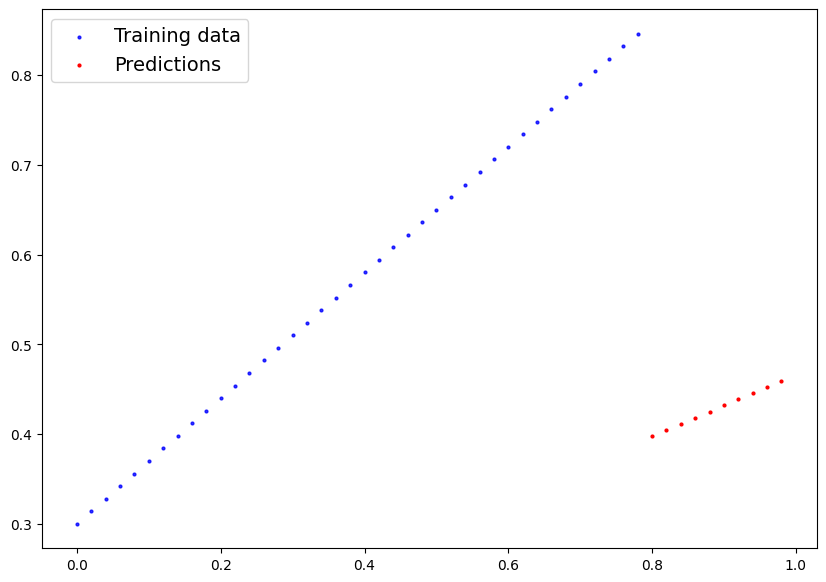

In [11]:
plot_predictions(predictions=y_preds)

In [12]:
# Setup loss func
loss_fn = nn.L1Loss()

#Setup an optimazer
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)

# Building a training loop (and testing)
0. Loop through the data
1. Froward pass (data moving through our model's forward()) to pred on data - aslo called forward propagation
2. Calculate the loss (compare forward pass pred to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calc the gradients of each of the params of our model with respect to the loss
5. Optimizer step = use the optimizer to adjust our model's params to try and improve the loss.

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# AN epoch in one loop through the data
epochs = 201
epoch_count = []
loss_values = []
test_loss_values = []
### Training
model_0.train()
# 0. Loop through the data
for epoch in range(epochs):
    #Set model to training mode
    #model_0.train() #model_0.eval() to evaluate a model

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calc the loss
    loss = loss_fn(y_pred, y_train)
    #print(f"Loss: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. perform backprop on the loss with the respect to the params of the model
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()
    ### Testing
    model_0.eval()
    with torch.inference_mode():
        #1. Forward pass
        test_pred = model_0(X_test)

        #2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.47563618421554565
OrderedDict({'weights': tensor([0.3467]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.17388132214546204 | Test loss: 0.2866361737251282
OrderedDict({'weights': tensor([0.4467]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.042198795825242996 | Test loss: 0.0987466350197792
OrderedDict({'weights': tensor([0.5466]), 'bias': tensor([0.3378])})
Epoch: 30 | Loss: 0.044207725673913956 | Test loss: 0.005456471350044012
OrderedDict({'weights': tensor([0.6069]), 'bias': tensor([0.3790])})
Epoch: 40 | Loss: 0.02264046110212803 | Test loss: 0.0635034516453743
OrderedDict({'weights': tensor([0.5870]), 'bias': tensor([0.3370])})
Epoch: 50 | Loss: 0.017085570842027664 | Test loss: 0.04095946624875069
OrderedDict({'weights': tensor([0.6223]), 'bias': tensor([0.3282])})
Epoch: 60 | Loss: 0.008707192726433277 | Test loss: 0.013333350419998169
OrderedDict({'weights': tensor([0.6657]), 'bias': tensor([0.3172])})
Epoch: 70 | Loss: 

In [15]:
model_0.eval()
with torch.inference_mode():
    new_pred = model_0(X_test)
new_pred, y_test

(tensor([[0.8604],
         [0.8745],
         [0.8885],
         [0.9025],
         [0.9165],
         [0.9305],
         [0.9445],
         [0.9585],
         [0.9725],
         [0.9865]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

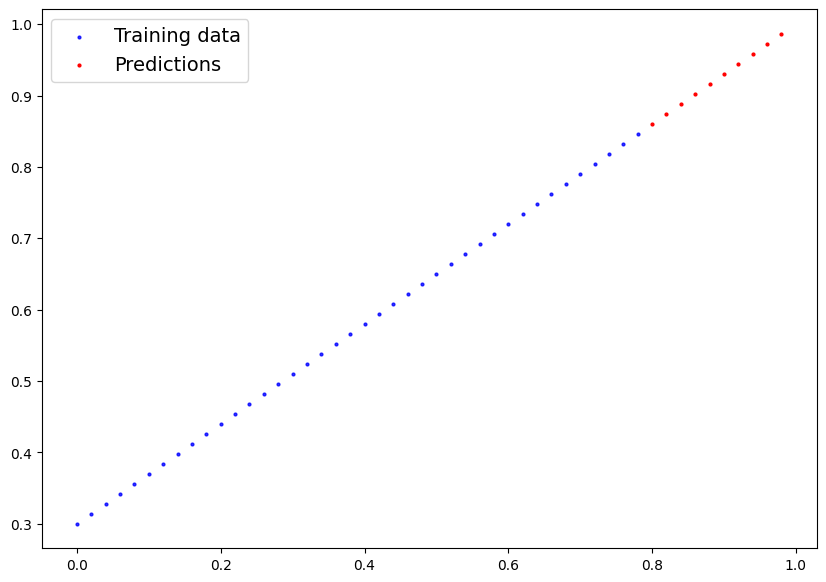

In [16]:
plot_predictions(predictions=new_pred)


#Saving a model in torch

1. torch.save = allows to save a oytorch object in python pickle format
2. torch.load =
3. torch.nn.Module.load_state_dict = this allows to load a model'ssaved satet dict

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#Saving out model
from pathlib import Path

#1. Create models dir
MODEL_PATH = Path("/content/drive/MyDrive/Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pythorchg_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#3. SAve the model state dict
print(f"Saveing model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saveing model to: /content/drive/MyDrive/Models/01_pythorchg_workflow_model_0.pth


In [19]:
### Download locally
"""from google.colab import files
torch.save(model_0.state_dict(), "model_0.pth")
files.download("model_0.pth")
"""

'from google.colab import files\ntorch.save(model_0.state_dict(), "model_0.pth")\nfiles.download("model_0.pth")\n'

In [20]:
#Saving a model in torch
"""torch.save({
    "epoch": epoch,
    "model_state_dict": model_0.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    "loss": loss,
}, "checkpoint.pth")

# Later
checkpoint = torch.load("checkpoint.pth")
model_0.load_state_dict(checkpoint["model_state_dict"])
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
epoch = checkpoint["epoch"]
loss = checkpoint["loss"]"""




'torch.save({\n    "epoch": epoch,\n    "model_state_dict": model_0.state_dict(),\n    "optimizer_state_dict": optimizer.state_dict(),\n    "loss": loss,\n}, "checkpoint.pth")\n\n# Later\ncheckpoint = torch.load("checkpoint.pth")\nmodel_0.load_state_dict(checkpoint["model_state_dict"])\noptimizer.load_state_dict(checkpoint["optimizer_state_dict"])\nepoch = checkpoint["epoch"]\nloss = checkpoint["loss"]'

In [21]:
!ls -l Models/

ls: cannot access 'Models/': No such file or directory


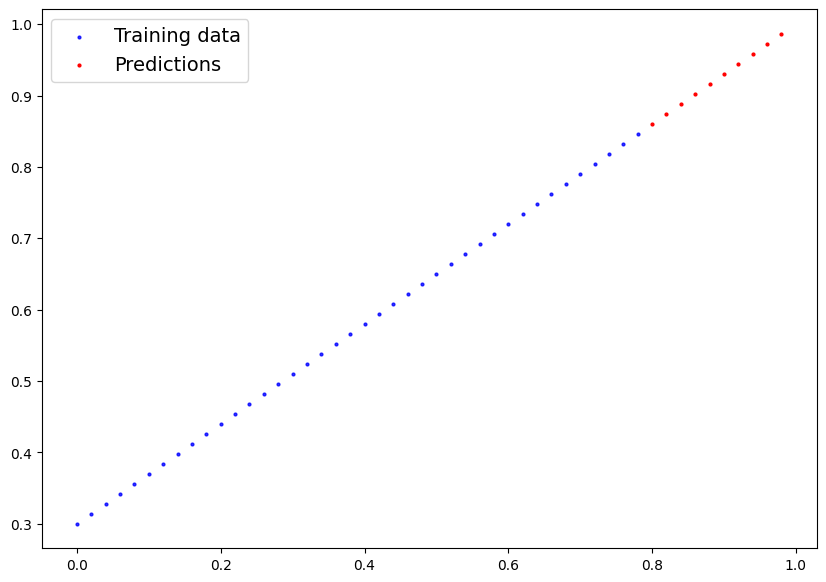

In [22]:
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model.eval()

with torch.inference_mode():
    loaded_pred = loaded_model(X_test)
plot_predictions(predictions=loaded_pred)

Create device-agnostic code.

This means if we ve got access to a GPU, our code will use it.

In [23]:
#Putting it all together
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [24]:
#6.1 Data
from sklearn.model_selection import train_test_split

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.005

#create X and y( features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)



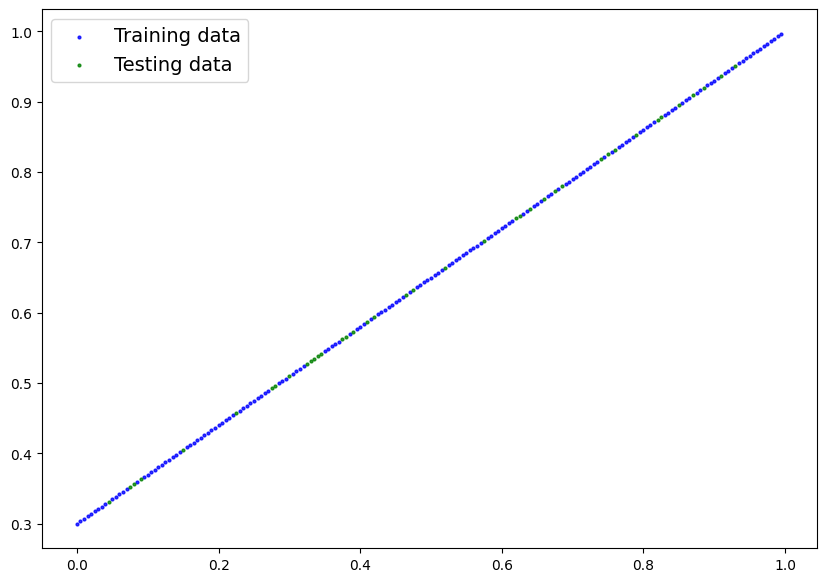

In [25]:
plot_predictions(X_train, X_test, y_train, y_test)

In [26]:
#6.2 Building a pytorch linear model

#Create a lin model by subclassing nn.Module
class LinRegModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        #Use nn.Linear()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set manual seed
torch.manual_seed(42)
model_1 = LinRegModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [27]:
#next(model_1.parameters()).device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [28]:
### 6.3 Training part

loss_fn = nn.L1Loss()

optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.01)

#loop

epochs = 201

for epoch in range(epochs):
    model_1.train()
    #1.  Calculate prediction
    y_pred = model_1(X_train.to(device))

    #2. Calc loss
    loss = loss_fn(y_pred, y_train.to(device))

    #3. zero grad
    optimizer.zero_grad()

    #4. backprop
    loss.backward()

    #5. optimizer step
    optimizer.step()

    #testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test.to(device))

        test_loss = loss_fn(test_pred, y_test.to(device))
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(model_1.state_dict())

Epoch: 0 | Loss: 0.5619786381721497 | Test loss: 0.5476044416427612
OrderedDict({'linear_layer.weight': tensor([[0.7545]]), 'linear_layer.bias': tensor([0.8200])})
Epoch: 10 | Loss: 0.41244134306907654 | Test loss: 0.39700454473495483
OrderedDict({'linear_layer.weight': tensor([[0.6545]]), 'linear_layer.bias': tensor([0.7200])})
Epoch: 20 | Loss: 0.26290398836135864 | Test loss: 0.24640469253063202
OrderedDict({'linear_layer.weight': tensor([[0.5545]]), 'linear_layer.bias': tensor([0.6200])})
Epoch: 30 | Loss: 0.11349209398031235 | Test loss: 0.09644904732704163
OrderedDict({'linear_layer.weight': tensor([[0.4546]]), 'linear_layer.bias': tensor([0.5200])})
Epoch: 40 | Loss: 0.07820911705493927 | Test loss: 0.0688752755522728
OrderedDict({'linear_layer.weight': tensor([[0.3932]]), 'linear_layer.bias': tensor([0.4409])})
Epoch: 50 | Loss: 0.07794283330440521 | Test loss: 0.06555961072444916
OrderedDict({'linear_layer.weight': tensor([[0.4133]]), 'linear_layer.bias': tensor([0.4154])})
Ep

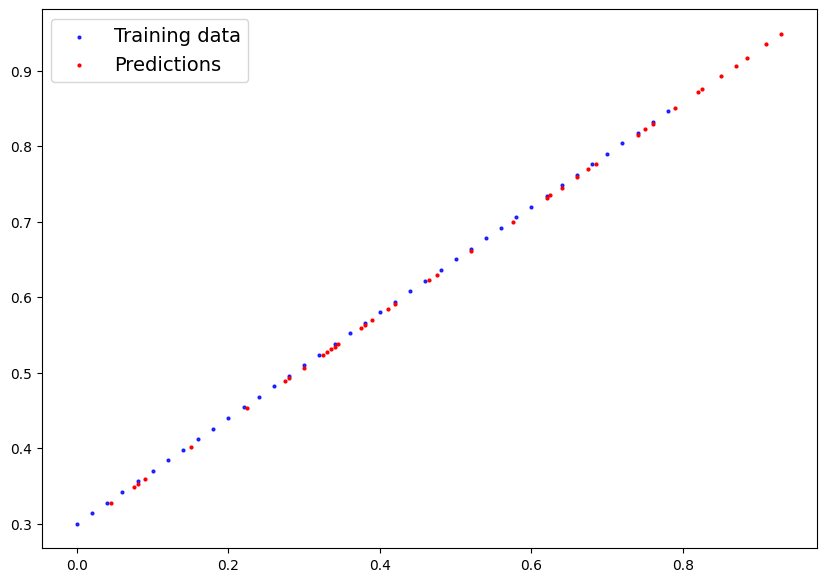

In [29]:
plot_predictions(test_data=X_test, predictions=test_pred.cpu())

In [32]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pythorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)